## Try to understand bathymetry grid cells of Fraser River inside NEMO

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import numpy.ma as ma
from salishsea_tools import bathy_tools
from salishsea_tools import nc_tools
from numpy import loadtxt

In [2]:
bathy = nc.Dataset('/ocean/jieliu/research/meopar/\
/nemo-forcing/grid/bathy_meter_SalishSea.nc', 'r')
nc_tools.show_variables(bathy)
bathyy = bathy.variables['Bathymetry'][:]

[u'nav_lon', u'nav_lat', u'Bathymetry']


   # Create bathy_meter_SalishSea3.nc as fixed and extended file

In [3]:
!cp /ocean/jieliu/research/meopar/nemo-forcing/grid/bathy_meter_SalishSea.nc \
bathy_meter_SalishSea3.nc
bathy_3 = nc.Dataset('bathy_meter_SalishSea3.nc','r+' )
bathyy_3 = bathy_3.variables['Bathymetry']
lon_3 = bathy_3.variables['nav_lon']
lat_3 = bathy_3.variables['nav_lat']

# Load river-bathymetry.txt file and assign value to bathyy_3

In [4]:
lines = loadtxt("river-bathymetry.txt", comments="#", delimiter=",", unpack=False)

In [5]:
list_of_lists = []
with open('river-bathymetry.txt') as f:
    for line in f:
        inner_list = [elt.strip() for elt in line.split(',')]
        # in alternative, if you need to use the file content as numbers
        # inner_list = [int(elt.strip()) for elt in line.split(',')]
        list_of_lists.append(inner_list)

In [6]:
by_cols = zip(*list_of_lists)
col_names = ('latitude index', 'longitude index', 'bathymetry')
by_names = {}
for i, col_name in enumerate(col_names):
    by_names[col_name] = by_cols[i]

In [7]:
lat_index = np.asarray(by_names['latitude index'])
lon_index = np.asarray(by_names['longitude index'])
bathy_index = np.asarray(by_names['bathymetry'])
jj = lat_index.astype(np.integer)
ii = lon_index.astype(np.integer)
bathy_value  = bathy_index.astype(np.float)

In [8]:
for i in np.arange(len(jj)):
    bathyy_3[jj[i], ii[i]] = bathy_value[i] + 3.095 ## assign values added with 3.095 mean sea level

/home/jieliu/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/home/jieliu/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


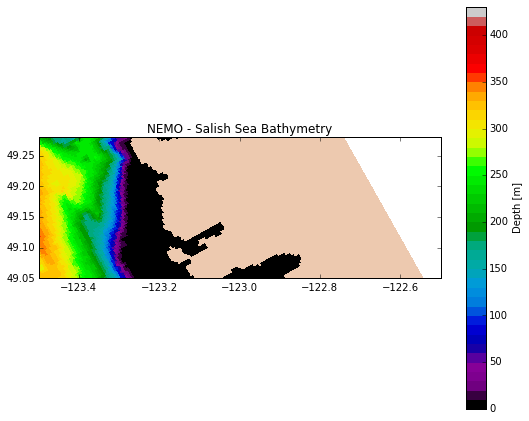

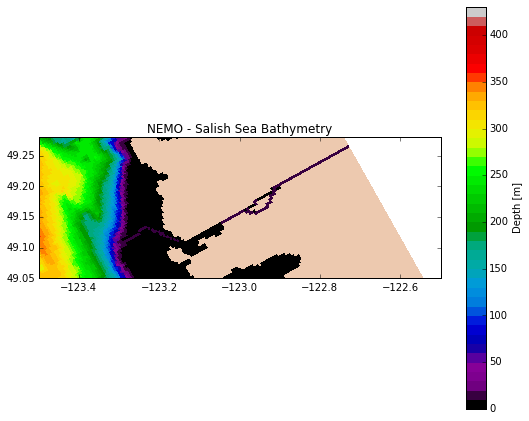

In [9]:
figg = bathy_tools.plot_colourmesh(
    bathy, 'NEMO - Salish Sea Bathymetry',
    axis_limits=(-123.5, -122.5, 49.05, 49.28), 
colour_map='spectral', bins=50)

figg = bathy_tools.plot_colourmesh(
    bathy_3, 'NEMO - Salish Sea Bathymetry',
    axis_limits=(-123.5, -122.5, 49.05, 49.28), 
colour_map='spectral', bins=50)

<matplotlib.colorbar.Colorbar instance at 0x7fea58a07878>

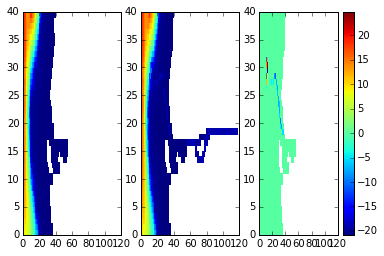

In [10]:
plt.subplot(1, 3, 1)
plt.pcolormesh(bathyy[400:440, 280:398])
plt.subplot(1, 3, 2)
plt.pcolormesh(bathyy_3[400:440, 280:398])
plt.subplot(1, 3, 3)
plt.pcolormesh(bathyy[400:440, 280:398] - bathyy_3[400:440, 280:398], 
               cmap=plt.cm.jet)
plt.colorbar()

In [11]:
coords = nc.Dataset('/ocean/jieliu/research/meopar\
/nemo-forcing/grid/coordinates_seagrid_SalishSea.nc', 'r')

In [12]:
lat_f = coords.variables['gphif'][0] #corner grid cell
lon_f = coords.variables['glamf'][0]
lon = bathy.variables['nav_lon']
lat = bathy.variables['nav_lat']

## Show center grid and corner grid

-123.31577301
49.1077346802
-18.9463806152
6.46408081055
2.405


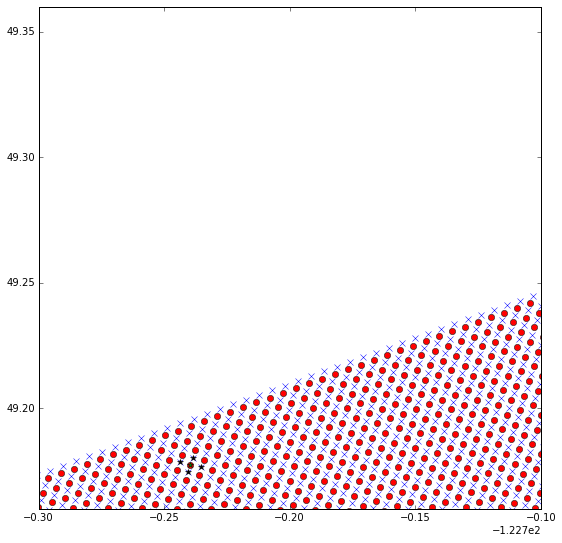

In [13]:
imin = 380; imax=420; jmin = 290; jmax = 398
plt.figure(figsize=(9,9))
plt.plot(lon[imin:imax,jmin:jmax], lat[imin:imax,jmin:jmax], 'or');
plt.plot(lon_f[imin:imax,jmin:jmax], lat_f[imin:imax,jmin:jmax], 'xb')
plt.plot(lon_f[416,354], lat_f[416,354], '*k')
plt.plot(lon_f[416,355], lat_f[416,355], '*k')
plt.plot(lon_f[415,354], lat_f[415,354], '*k')
plt.plot(lon_f[415,355], lat_f[415,355], '*k')
plt.plot(lon[416,355], lat[416,355], '*g')
plt.xlim((-123., -122.8))
plt.ylim(( 49.16, 49.36))
print (lon[429, 291])
print (lat[429, 291])
print (lon[429, 291] + 123) * 60
print (lat[429, 291] -49) *60
print (10.26 - 10) *9.25

# Useful snippet

In [14]:
with open('test.txt') as f:
    rows = (row.strip().split() for row in f)
    a = zip(*(row for row in rows if row))